In [155]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
import matplotlib.pyplot as plt
from PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs import make_gmm_program_diagonal

In [157]:
from PFNExperiments.LatentFactorModels.GenerativeModels.LatenFactorModel_abstract import return_only_x
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC import Hamiltionian_MC

from PFNExperiments.LatentFactorModels.ComparisonModels.MakeDefaultListComparison import make_default_list_comparison, make_reduced_list_comparison

In [158]:
pprogram = make_gmm_program_diagonal(
    n = 100,
    p = 5,
    k = 3,
    a1 = 5.0,
    b1= 2.0,
    dirichlet_beta= 0.5,
    lambda1 = 3.0,
    )

In [166]:
r = pprogram(
)

x = r["x"]

torch.Size([100, 2])


In [160]:
r["mu"].shape, r["sigma_squared"].shape, r["z"].shape

(torch.Size([2, 3]), torch.Size([2, 3]), torch.Size([100]))

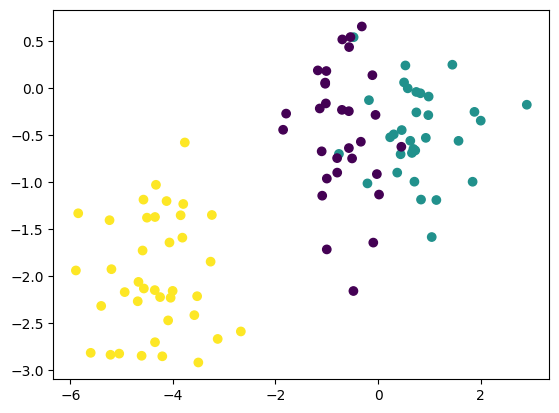

In [161]:
plt.scatter(r["x"][:,0], r["x"][:,1], c = r["z"])

In [162]:
pprogram_return_only_x = return_only_x(pprogram)

In [163]:
models = make_default_list_comparison(pprogram= pprogram_return_only_x, n_samples= 50)

model_list = {
        "hmc_sampler": models[0],
        "vi_diag": models[1],
        "vi_multivariate_normal": models[2],
        "vi_laplace": models[3],
        "vi_autoIAF": models[4],
        "vi_autostrucured": models[5],
}

In [164]:
x.shape

torch.Size([100, 2])

In [165]:
samples_per_model = {}

for name, model in model_list.items():
    samples_per_model[name] = model.sample_posterior(x = x.T)

Warmup:   0%|          | 0/75 [00:00, ?it/s]

torch.Size([2, 100])


ValueError: Shape mismatch inside plate('data') at site x dim -1, 100 vs 3
     Trace Shapes:            
      Param Sites:            
     Sample Sites:            
          phi dist         | 3
             value         | 3
   components dist         |  
             value       3 |  
         dims dist         |  
             value       2 |  
sigma_squared dist   2   3 |  
             value   2   3 |  
           mu dist   2   3 |  
             value   2   3 |  
         data dist         |  
             value     100 |  
            z dist     100 |  
             value 3 1   1 |  

In [ ]:
r["mu"], r["sigma_squared"]

(tensor([-3.9802,  5.3649,  0.9867]), tensor([0.5070, 0.3073, 0.5948]))

tensor([-1.6659,  5.3683,  1.1975]) tensor(2.9000)
tensor([2.0450, 0.3079, 1.2724]) tensor(0.7224)


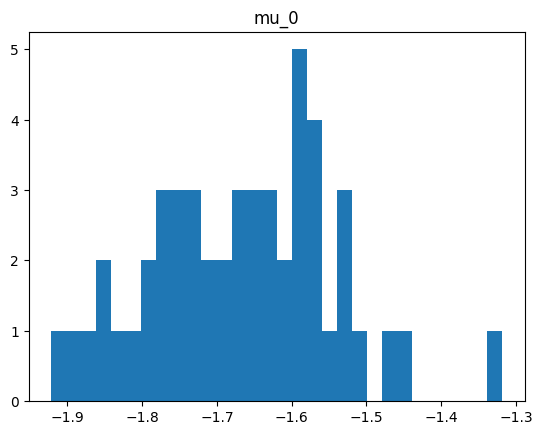

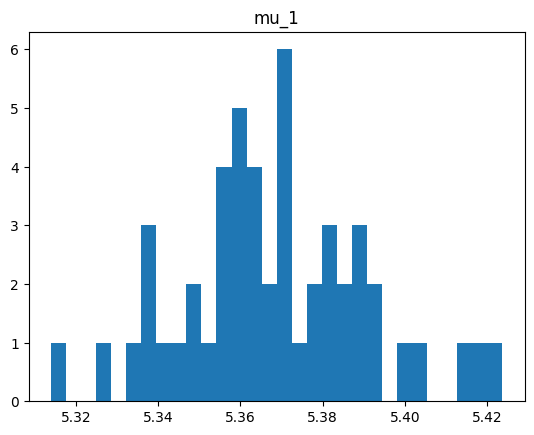

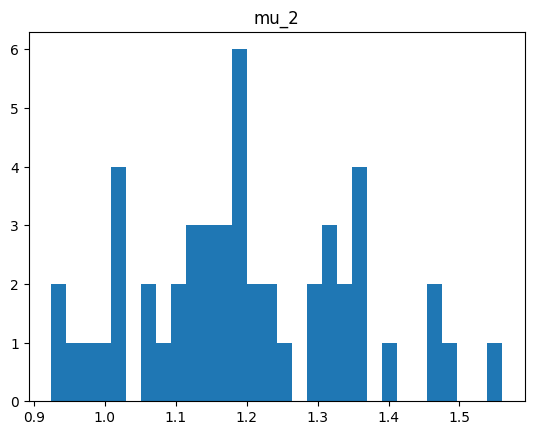

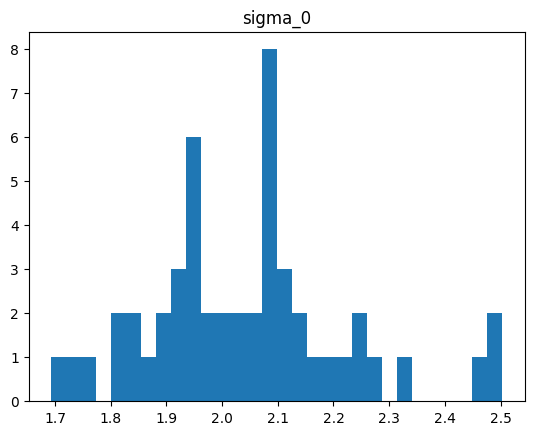

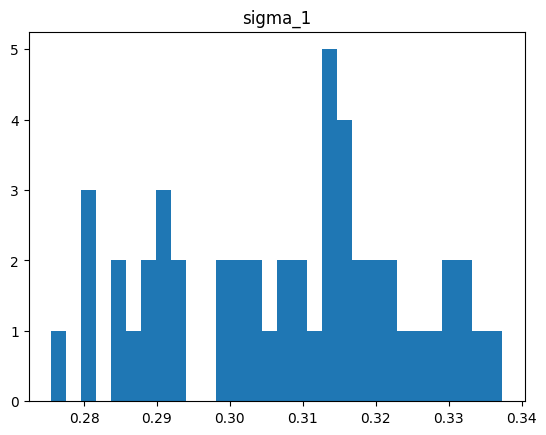

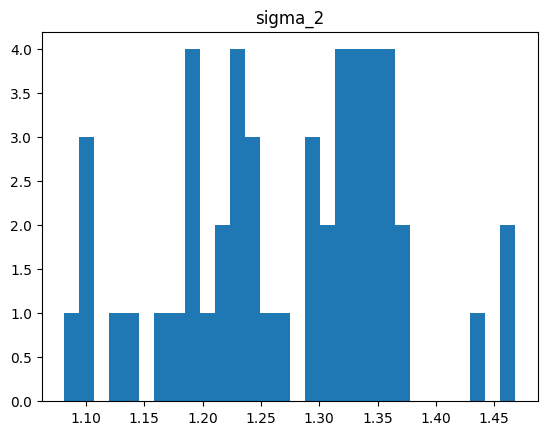

In [ ]:
c_model = "vi_multivariate_normal"
samples_mu = samples_per_model[c_model]["mu"]
samples_sigma = samples_per_model[c_model]["sigma_squared"]

print(samples_mu.mean(dim = 0), samples_mu.std())
print(samples_sigma.mean(dim = 0), samples_sigma.std())


for dim in range(3):
    plt.figure()
    plt.hist(samples_per_model[c_model]["mu"][:,dim], bins = 30)
    plt.title(f"mu_{dim}")

for dim in range(3):
    plt.figure()
    plt.hist(samples_per_model[c_model]["sigma_squared"][:,dim], bins = 30)
    plt.title(f"sigma_{dim}")

In [ ]:
samples_per_model["vi_multivariate_normal"]["sigma_squared"].median()

tensor(1.2940)

In [ ]:
model = Hamiltionian_MC(
    pprogram=pprogram_return_only_x,
    n_samples=500,
    n_warmup=500
)

In [ ]:
samples = model.sample_posterior(x = x)

Sample: 100%|██████████| 1000/1000 [01:32, 10.84it/s, step size=5.59e-01, acc. prob=0.924]


In [ ]:
r["mu"]

tensor([-3.9802,  5.3649,  0.9867])

In [ ]:
samples.keys()

dict_keys(['mu', 'phi', 'sigma_squared'])

In [ ]:
samples["mu"].median(dim = 0)

torch.return_types.median(
values=tensor([ 1.0558,  5.3790, -4.1347]),
indices=tensor([334, 389,  28]))

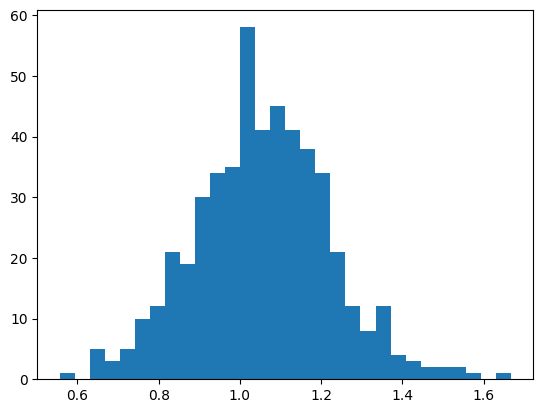

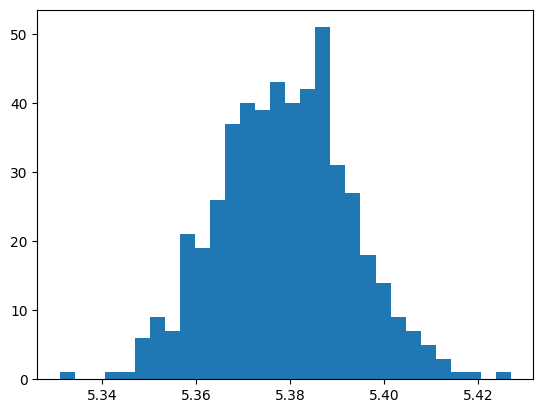

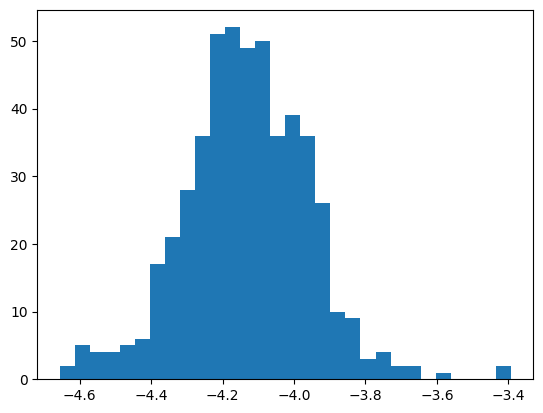

In [ ]:
for dim in range(3):
    plt.hist(samples["mu"][:,dim].numpy(), bins = 30)
    plt.show()

In [ ]:
r["sigma_squared"]

tensor([0.5070, 0.3073, 0.5948])

In [ ]:
samples["sigma_squared"].median(dim = 0)

torch.return_types.median(
values=tensor([0.6933, 0.3093, 0.5158]),
indices=tensor([168, 109, 482]))

In [ ]:
pprogram_batched = make_gmm_program_univariate_batched(
    n = 100,
    p = 3,
    batch_size = 1000,
    a1 = 5.0,
    b1 = 2.0,
    dirichlet_beta = 1.0,
    lambda1 = 3.0,
    )

NameError: name 'make_gmm_program_univariate_batched' is not defined

In [ ]:
samples_batched = pprogram_batched()

In [ ]:
samples_batched["sigma_squared"].shape

torch.Size([1000, 3])

In [ ]:
for key in samples_batched.keys():
    print(key, samples_batched[key].shape)

phi torch.Size([3, 1000])
mu torch.Size([1000, 3])
sigma_squared torch.Size([1000, 3])
z torch.Size([1000, 100])
x torch.Size([1000, 100])
beta torch.Size([1000, 6])
